In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

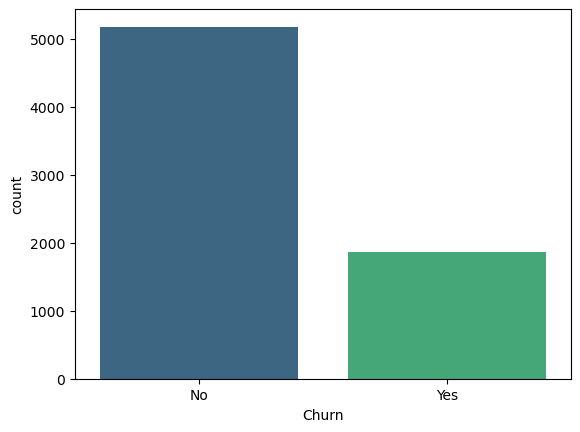

In [10]:
sns.countplot(data=df, x='Churn',hue='Churn', palette='viridis')

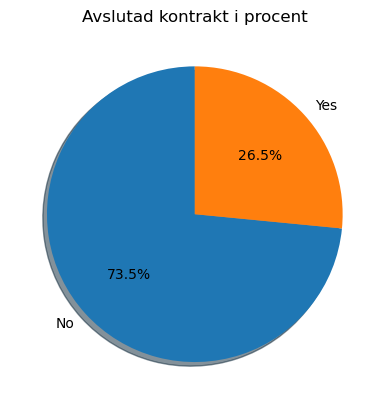

In [11]:
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Avslutad kontrakt i procent')
plt.show()

In [12]:
tenure_churn_counts = df.groupby(['tenure','Churn']).size().unstack(fill_value=0)

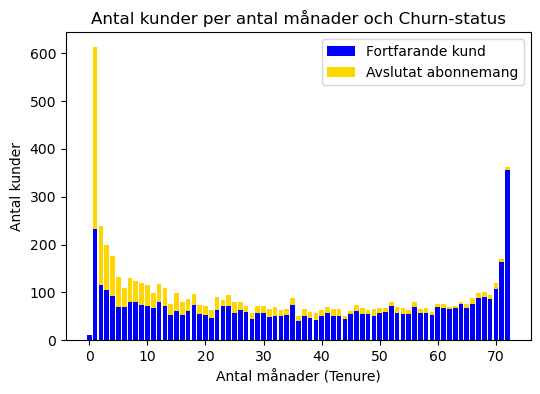

In [13]:
plt.figure(figsize=(6, 4), dpi=100)

plt.bar(tenure_churn_counts.index, tenure_churn_counts['No'], label='Fortfarande kund', color='blue')


plt.bar(tenure_churn_counts.index, tenure_churn_counts['Yes'], bottom=tenure_churn_counts['No'], label='Avslutat abonnemang', color='gold')

plt.xlabel('Antal månader (Tenure)')
plt.ylabel('Antal kunder')
plt.title('Antal kunder per antal månader och Churn-status')

plt.legend()
plt.show()


In [14]:
gender_count = df['gender'].value_counts()
print(gender_count)

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [15]:
churned_customers = df[df['Churn'] == 'Yes']
churned_customers.value_counts().sum()

1869

In [16]:
churned_by_gender = churned_customers.groupby('gender').size().reset_index(name='Total Churned')
churned_by_gender

,gender,Total Churned
0,Female,939
1,Male,930


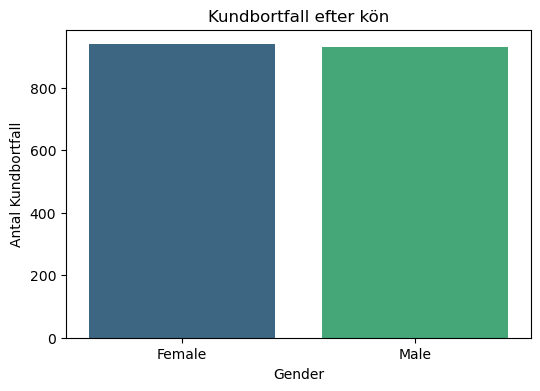

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='Total Churned', data=churned_by_gender, hue='gender', palette='viridis')
plt.title('Kundbortfall efter kön')
plt.xlabel('Gender')
plt.ylabel('Antal Kundbortfall')
plt.show()

In [18]:
churned_by_partner = churned_customers['Partner'].value_counts()
churned_by_partner.head()

Partner
No     1200
Yes     669
Name: count, dtype: int64

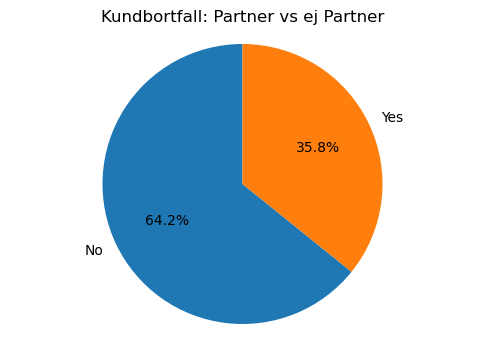

In [19]:
plt.figure(figsize=(6,4))
plt.pie(churned_by_partner, labels=churned_by_partner.index, autopct='%1.1f%%',colors=plt.get_cmap('tab10').colors, startangle=90)
plt.title('Kundbortfall: Partner vs ej Partner')
plt.axis('equal')
plt.show()

In [20]:
payment_count = churned_customers['PaymentMethod'].value_counts()
print(payment_count)

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64


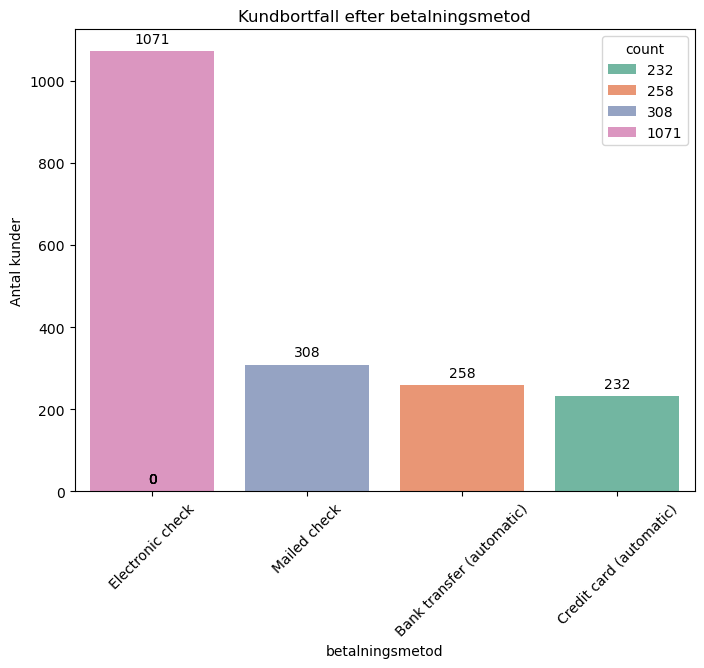

In [21]:
plt.figure(figsize=(8,6))
ax= sns.barplot(x=payment_count.index,y=payment_count.values, hue=payment_count, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0,9),
                textcoords='offset points')


plt.title('Kundbortfall efter betalningsmetod')
plt.xlabel('betalningsmetod')
plt.ylabel('Antal kunder')
plt.xticks(rotation=45)
plt.show()

In [22]:
contract_count = churned_customers['Contract'].value_counts()
contract_count

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

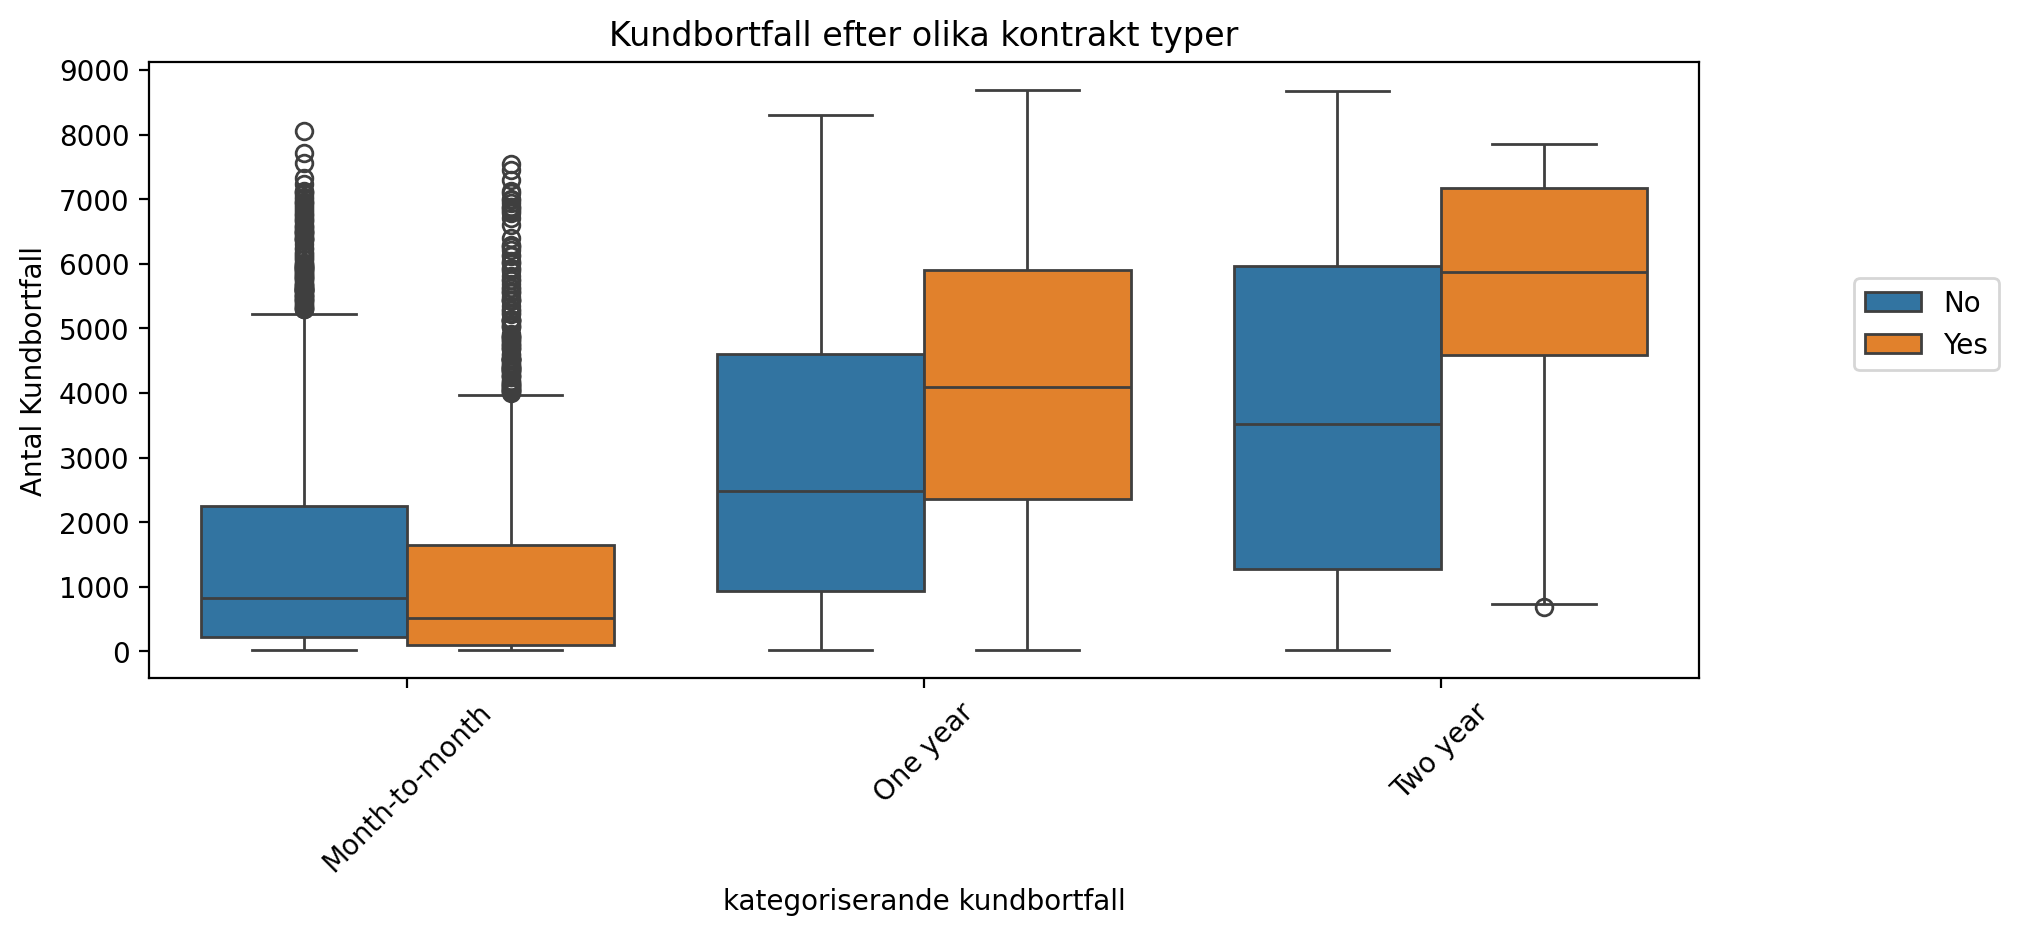

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

plt.figure(figsize=(10, 4), dpi=200)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')

y_ticks = np.arange(0, df['TotalCharges'].max() + 1000, 1000)
plt.yticks(y_ticks)


plt.legend(loc=(1.1, 0.5))


plt.title('Kundbortfall efter olika kontrakt typer')
plt.xlabel('kategoriserande kundbortfall')
plt.ylabel('Antal Kundbortfall')
plt.xticks(rotation=45)
plt.show()

In [24]:
churned_customers['tenure'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72], dtype=int64)

In [25]:
churned_customers = churned_customers.copy()

bins = [0, 6, 12, 18, 24, churned_customers['tenure'].max()]
labels = ['0-6 Months', '6-12 Months', '12-18 Months', '18-24 Months', '>24 Months']

churned_customers['tenure_group'] = pd.cut(churned_customers['tenure'], bins=bins, labels=labels)

tenure_groups = churned_customers['tenure_group'].value_counts().reset_index(name='total_churned_customers')

tenure_groups.columns = ['tenure_group', 'total_churned_customers']

print(tenure_groups)


   tenure_group  total_churned_customers
0    0-6 Months                      784
1    >24 Months                      538
2   6-12 Months                      253
3  12-18 Months                      177
4  18-24 Months                      117


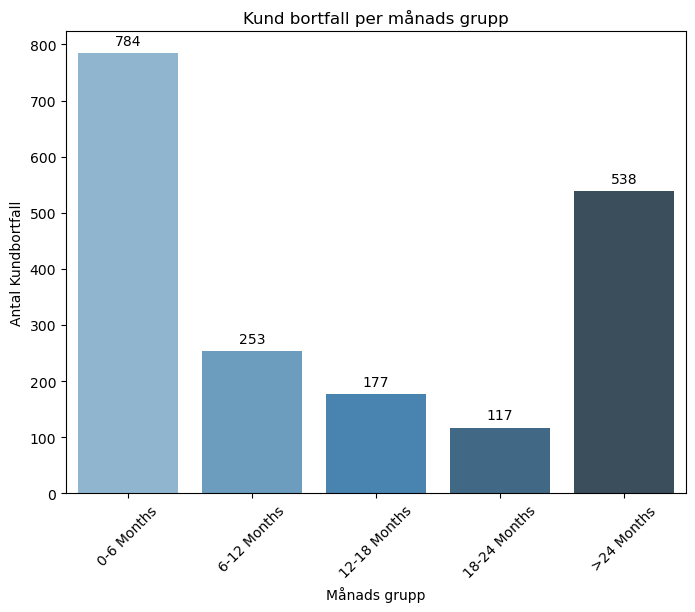

In [26]:
plt.figure(figsize=(8,6))
ax= sns.barplot(x='tenure_group',y='total_churned_customers', data=tenure_groups, hue='tenure_group' , palette='Blues_d',legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0,9),
                textcoords='offset points')


plt.title('Kund bortfall per månads grupp')
plt.xlabel('Månads grupp')
plt.ylabel('Antal Kundbortfall')
plt.xticks(rotation=45)
plt.show()

In [27]:
InternetService_count =  churned_customers['InternetService'].value_counts()
InternetService_count

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

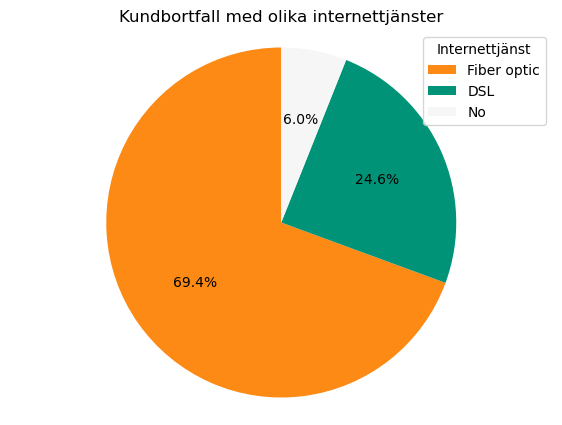

In [28]:
plt.figure(figsize=(7, 5))
plt.pie(InternetService_count, labels=None, autopct='%1.1f%%', colors=['#FC8A15','#009378','#F6F6F6'], startangle=90)
plt.legend(InternetService_count.index, title="Internettjänst", loc="best")
plt.title('Kundbortfall med olika internettjänster')
plt.axis('equal')  
plt.show()

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

churned_customers = df[df['Churn'] == 'Yes']

In [30]:
churned_customers['MonthlyCharges'].max()

118.35

<function matplotlib.pyplot.show(close=None, block=None)>

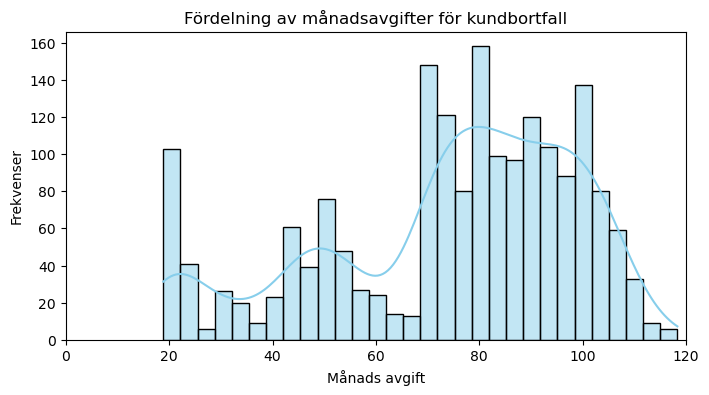

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(churned_customers['MonthlyCharges'],bins=30, kde=True, color='skyblue')
plt.xlim(0,120)

plt.title('Fördelning av månadsavgifter för kundbortfall')
plt.xlabel('Månads avgift')
plt.ylabel('Frekvenser')
plt.show

In [32]:
print(churned_customers['TotalCharges'].max())
print(churned_customers['TotalCharges'].min())

8684.8
18.85


Text(0, 0.5, 'Frekvenser')

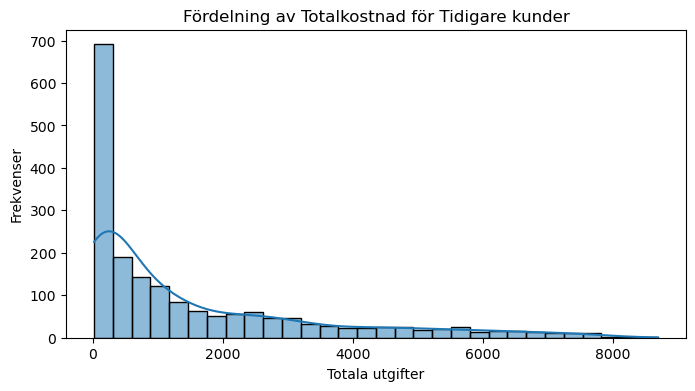

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(churned_customers['TotalCharges'], bins=30, kde=True)

plt.title('Fördelning av Totalkostnad för Tidigare kunder')
plt.xlabel('Totala utgifter')
plt.ylabel('Frekvenser')

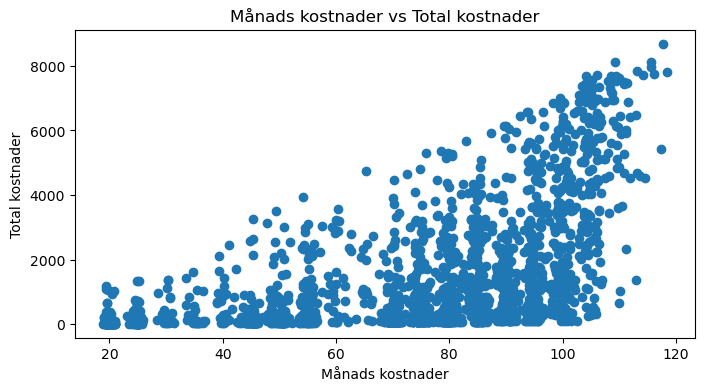

In [34]:
plt.figure(figsize=(8, 4))
plt.scatter(churned_customers['MonthlyCharges'], churned_customers['TotalCharges'])

plt.title("Månads kostnader vs Total kostnader")
plt.xlabel("Månads kostnader")
plt.ylabel("Total kostnader")
plt.show()

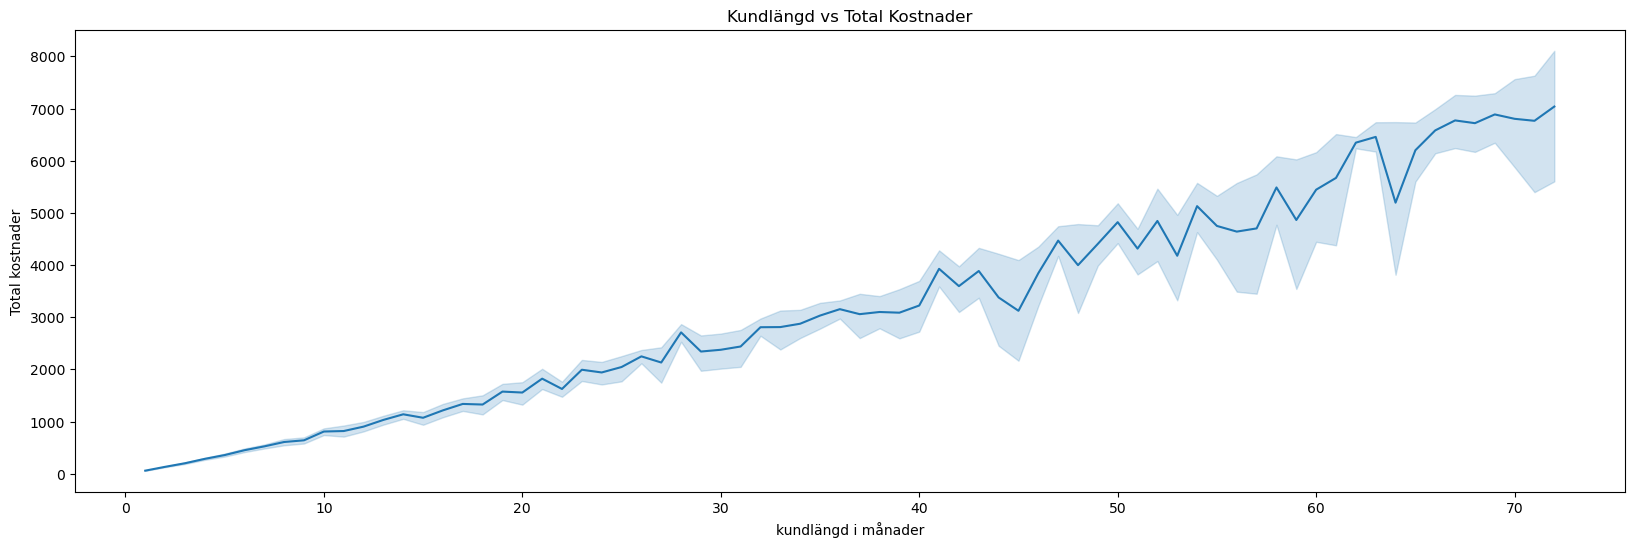

In [35]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=churned_customers['tenure'], y=churned_customers['TotalCharges'])
plt.title("Kundlängd vs Total Kostnader")
plt.xlabel("kundlängd i månader")
plt.ylabel("Total kostnader")
plt.show()

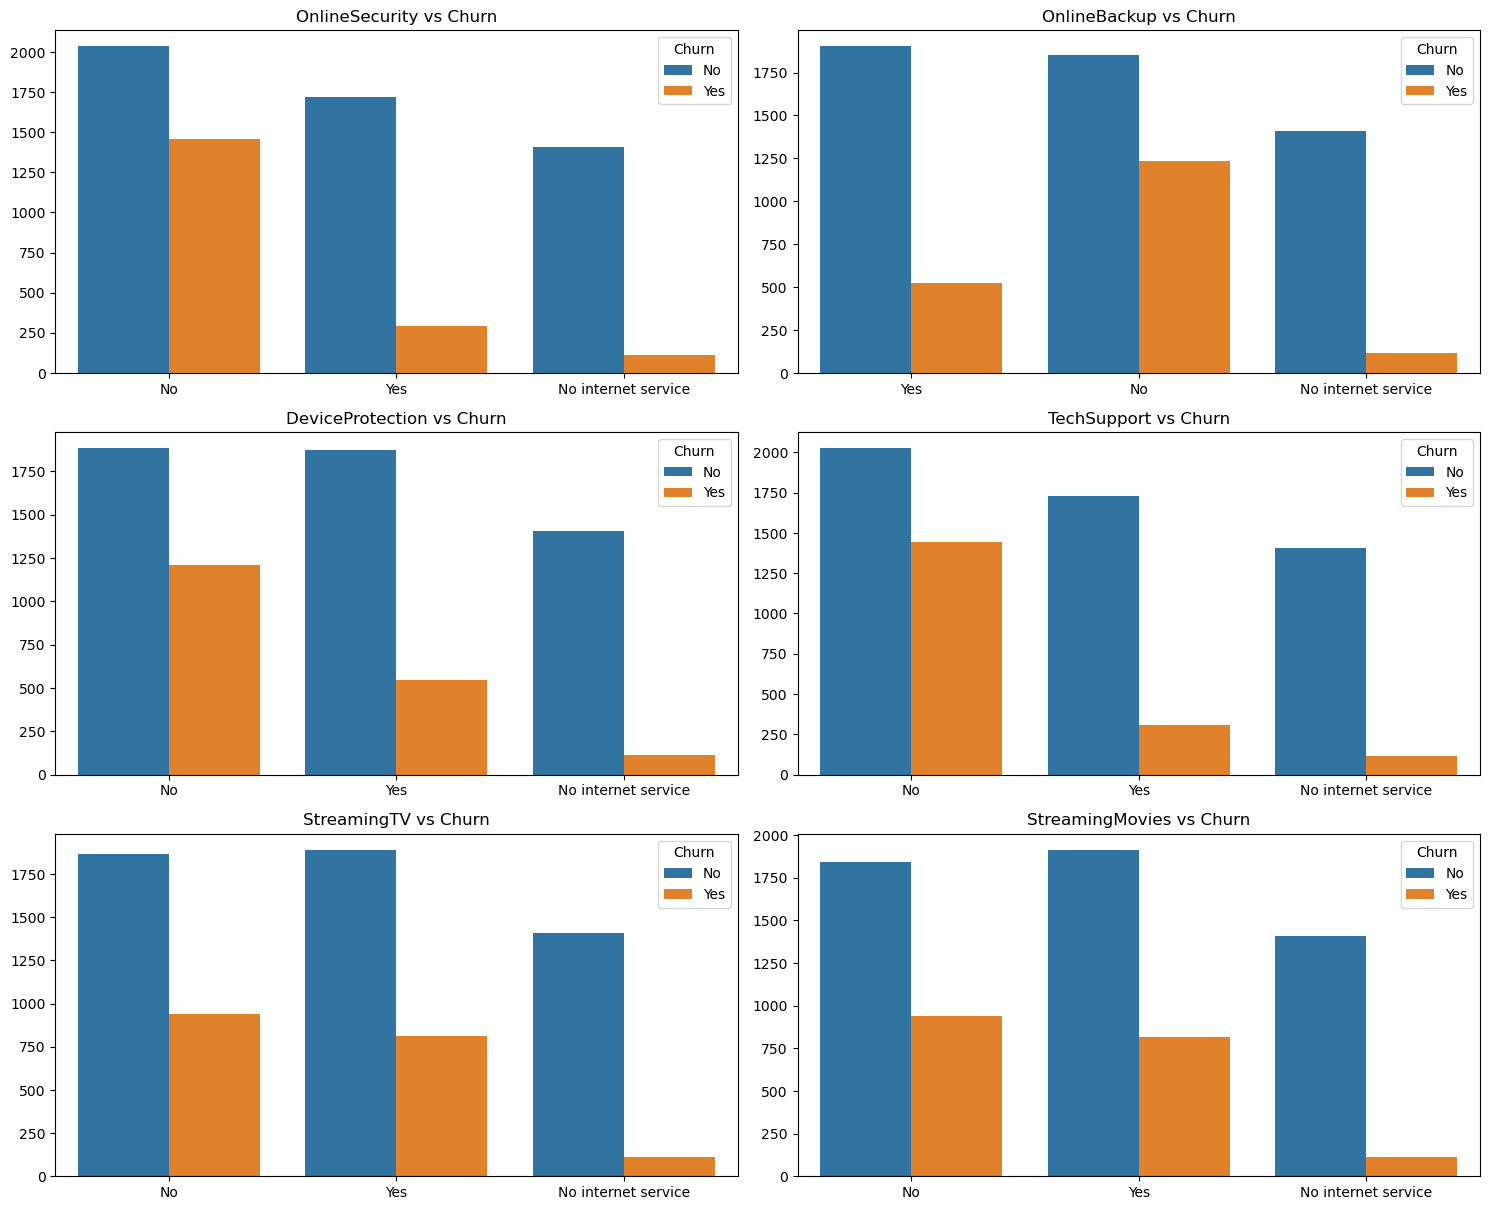

In [36]:
columns_with_no_internet = [col for col in df if 'No internet service' in df[col].values]

plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_with_no_internet, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [37]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [38]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [39]:
df.drop(['customerID','gender'],axis=1,inplace=True)

In [40]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
def df_clean(df, columns):
    
    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_converted = [
    "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
    "PaperlessBilling", "Churn"
]

df_clean(df, columns_converted)

df.head()

C:\Users\serha\AppData\Local\Temp\ipykernel_7372\3459699050.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [42]:
df.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
def df_info(df):
    info_columns = {
        'Name': [],
        'Data_Type': [],'Null_Values': [],
        'Num_of_unique': [], 'Unique_Values': []
    }

    for col in df.columns:
        info_columns['Name'].append(col)
        info_columns['Data_Type'].append(df[col].dtype)
        info_columns['Null_Values'].append(df[col].isnull().sum())
        info_columns['Num_of_unique'].append(df[col].nunique())
        info_columns['Unique_Values'].append(df[col].unique())

    info_df = pd.DataFrame(info_columns)
    return info_df

info_df = df_info(df)

print(info_df)


                Name Data_Type  Null_Values  Num_of_unique  \
0      SeniorCitizen     int64            0              2   
1            Partner     int64            0              2   
2         Dependents     int64            0              2   
3             tenure     int64            0             72   
4       PhoneService     int64            0              2   
5      MultipleLines    object            0              2   
6    InternetService    object            0              3   
7     OnlineSecurity     int64            0              2   
8       OnlineBackup     int64            0              2   
9   DeviceProtection     int64            0              2   
10       TechSupport     int64            0              2   
11       StreamingTV     int64            0              2   
12   StreamingMovies     int64            0              2   
13          Contract    object            0              3   
14  PaperlessBilling     int64            0              2   
15     P

In [44]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

columns = ["MultipleLines", "InternetService", "Contract", "PaymentMethod"]

for column in columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import average_precision_score


In [46]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
[[921 112]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



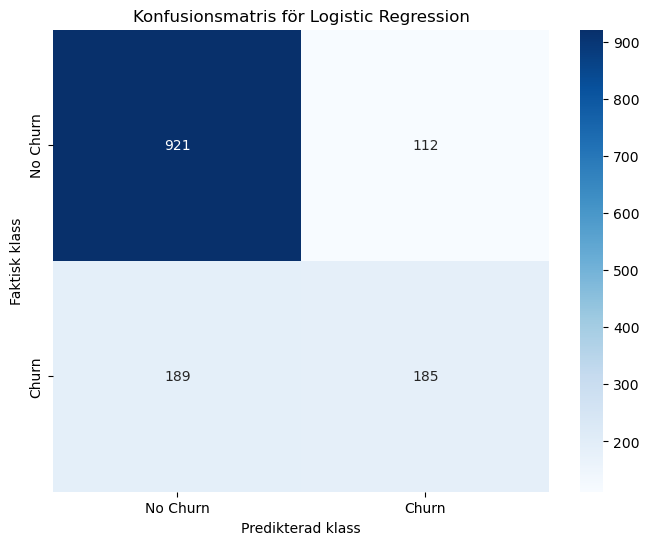

In [50]:
cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title('Konfusionsmatris för Logistic Regression')
plt.xlabel('Predikterad klass')
plt.ylabel('Faktisk klass')


plt.show()

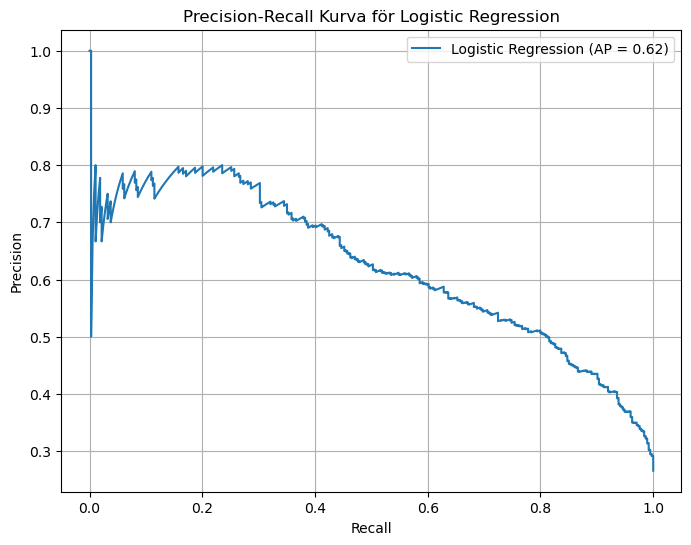

In [51]:
y_scores = log_reg.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


average_precision = average_precision_score(y_test, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Kurva för Logistic Regression')
plt.legend(loc="best")
plt.grid(True)
plt.show()



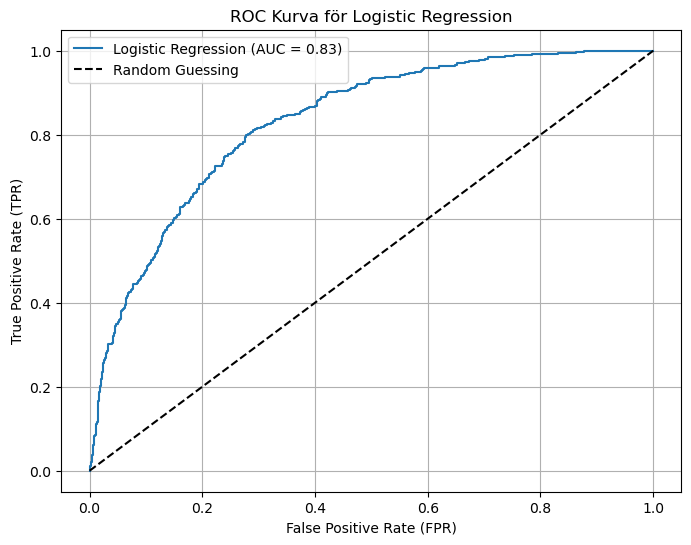

In [52]:
y_scores = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

auc_score = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Kurva för Logistic Regression')
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [53]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree:
[[811 222]
 [175 199]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1033
           1       0.47      0.53      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.72      1407



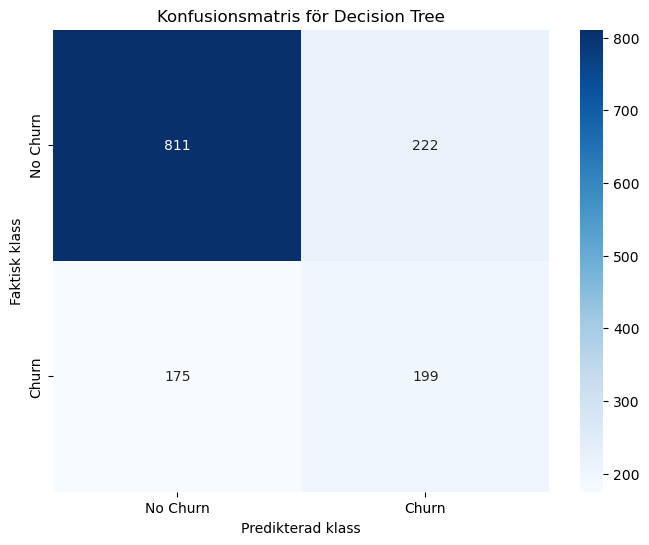

In [54]:
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title('Konfusionsmatris för Decision Tree')
plt.xlabel('Predikterad klass')
plt.ylabel('Faktisk klass')
plt.show()

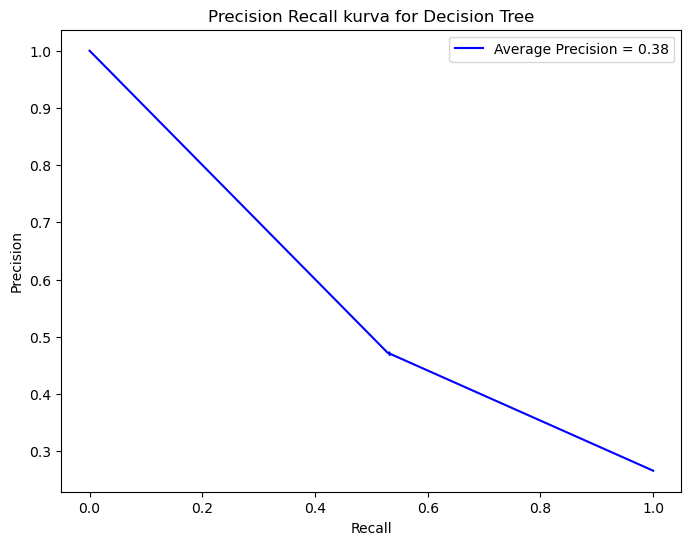

In [55]:
y_scores_tree = decision_tree.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_tree)

avg_precision = average_precision_score(y_test, y_scores_tree)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}', color='b')

plt.title('Precision Recall kurva for Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

plt.show()


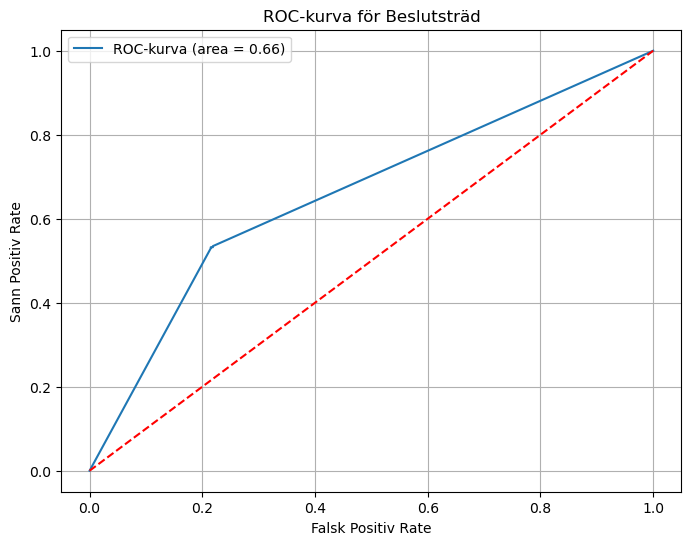

In [56]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

y_scores = decision_tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC-kurva (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC-kurva för Beslutsträd')
plt.xlabel('Falsk Positiv Rate')
plt.ylabel('Sann Positiv Rate')
plt.legend(loc='best')
plt.grid()
plt.show()


In [57]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest:
[[924 109]
 [193 181]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



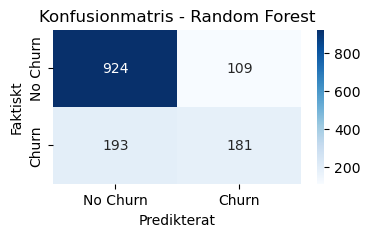

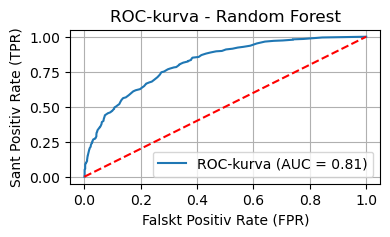

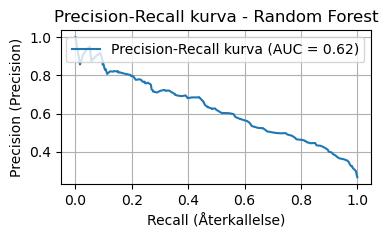

In [58]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)
y_scores_forest = random_forest.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Konfusionmatris - Random Forest')
plt.ylabel('Faktiskt')
plt.xlabel('Predikterat')
plt.show()

fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores_forest)
roc_auc = roc_auc_score(y_test, y_scores_forest)

plt.figure(figsize=(4, 2))
plt.plot(fpr, tpr, label=f'ROC-kurva (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC-kurva - Random Forest')
plt.xlabel('Falskt Positiv Rate (FPR)')
plt.ylabel('Sant Positiv Rate (TPR)')
plt.legend(loc='best')
plt.grid()
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores_forest)
pr_auc = auc(recall, precision)

plt.figure(figsize=(4, 2))
plt.plot(recall, precision, label=f'Precision-Recall kurva (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall kurva - Random Forest')
plt.xlabel('Recall (Återkallelse)')
plt.ylabel('Precision (Precision)')
plt.legend(loc='best')
plt.grid()
plt.show()


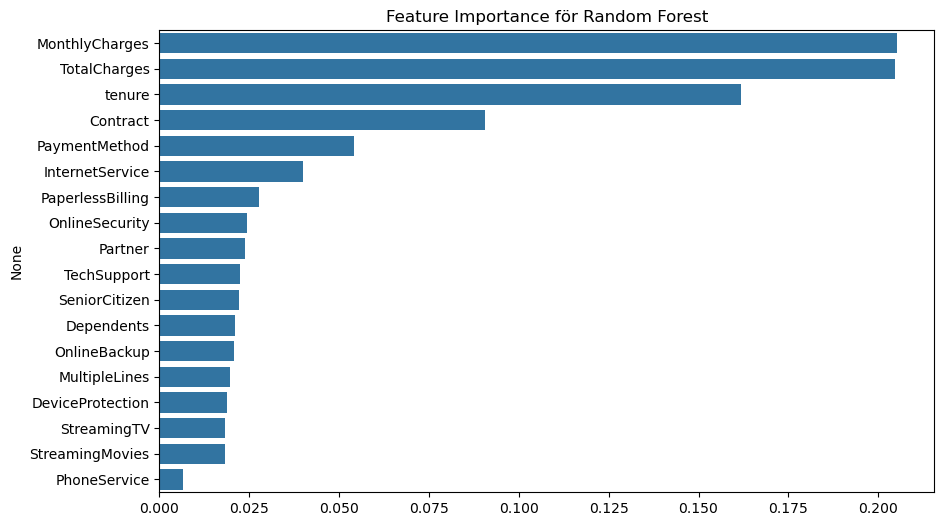

In [60]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

feature_names = df.columns[:-1]

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importance för Random Forest")
plt.show()



In [63]:
original_feature_names = df.columns[:-1]

y_proba = random_forest.predict_proba(X_test)[:, 1]

print("Size of y_proba:", y_proba.shape)
print("Size of X_test:", X_test.shape)

if isinstance(X_test, np.ndarray):
    X_test_copy = pd.DataFrame(X_test, columns=original_feature_names)  # Använd kolumnnamn
else:
    X_test_copy = X_test.copy()

X_test_copy['Churn_Probability'] = y_proba

high_risk_customers = X_test_copy.sort_values(by='Churn_Probability', ascending=False)
print(high_risk_customers.head(10))

Size of y_proba: (1407,)
Size of X_test: (1407, 18)
      SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
1053      -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
224       -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
299       -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
857       -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
855       -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
1268      -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
31        -0.437590 -0.962481   -0.653684 -1.277169      0.328871   
16         2.285245 -0.962481   -0.653684 -1.277169      0.328871   
985        2.285245 -0.962481   -0.653684 -1.277169      0.328871   
642        2.285245 -0.962481   -0.653684 -1.277169      0.328871   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1053      -0.845541         0.165345       -0.635172     -0.728145   
224       -0.845541         0.165345       -0.63

In [64]:
from sklearn.cluster import KMeans

segmentation_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[segmentation_features])

df['Cluster'] = clusters

print(df['Cluster'].value_counts())


Cluster
2    4160
1    1613
0    1259
Name: count, dtype: int64


In [65]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0,2
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,2
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,2
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,2
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,2


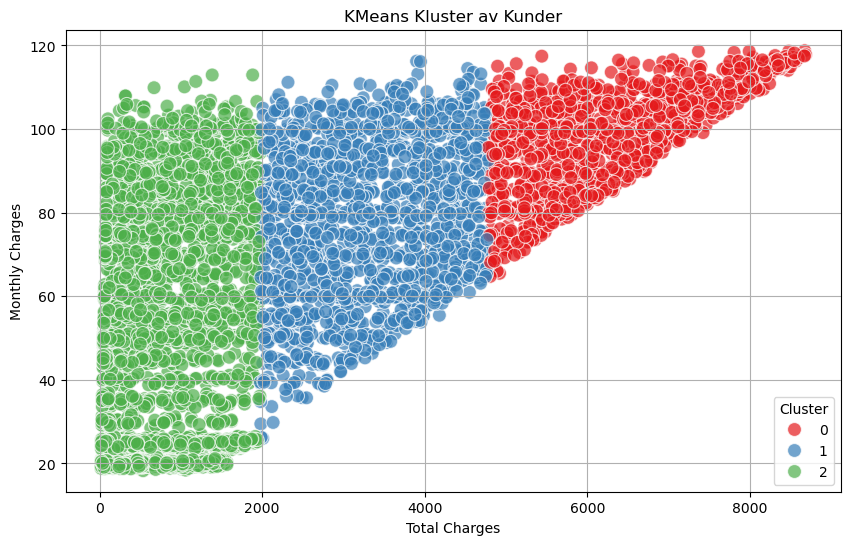

In [67]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Cluster', palette='Set1', s=100, alpha=0.7)

plt.title('KMeans Kluster av Kunder')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')

plt.legend(title='Cluster')
plt.grid(True)
plt.show()
